# Data Science Task -01
# Detecting Fake News

## Objective:
## Differentiate between real and fake news using a Python project applying a PassiveAggressiveClassifier.

## Data Reading:news is Real or Fake


#### Here only 100 dataset mention

In [35]:

news_data= pd.read_csv("news.csv")
news_data.head(100)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
95,8290,The Mandela Effect was made by one overlooked ...,"link There is simply no more denying, for mill...",FAKE
96,6227,CNN: One voter can make a difference by voting...,Channel list \nFollowing hurricane Matthew's f...,FAKE
97,3255,Give Social Security recipients a CEO-style raise,(CNN) On Veterans Day we recognize and honor t...,REAL
98,3177,"Fireworks erupt between Trump and Bush, Rubio ...",Sparks flew at the toughest and liveliest GOP ...,REAL


### Now import the all essential python library

In [36]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

### Here we are finding only 20 data to easly understood 

In [37]:
news_data= pd.read_csv("news.csv")
news_data.head(20)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


### Find The information of news

In [38]:
news_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  225 non-null    int64 
 1   title       225 non-null    object
 2   text        225 non-null    object
 3   label       224 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


### shape of news

In [39]:
news_data.shape

(225, 4)

## Label of News out of 225

In [29]:
news_data["label"].value_counts()

label
REAL    115
FAKE    109
Name: count, dtype: int64

## 20 dataset 

In [30]:
labels= news_data.label
labels.head(20)

0     FAKE
1     FAKE
2     REAL
3     FAKE
4     REAL
5     FAKE
6     FAKE
7     REAL
8     REAL
9     REAL
10    REAL
11    REAL
12    FAKE
13    FAKE
14    REAL
15    REAL
16    FAKE
17    FAKE
18    REAL
19    REAL
Name: label, dtype: object

### First, we split the dataset into train & test samples:


In [17]:

labels = news_data.label

# Split the dataset into training and testing samples
x_train, x_test, y_train, y_test = train_test_split(news_data["text"], labels, test_size=0.4, random_state=7)

# Print the shapes of the resulting splits to verify
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (135,)
x_test shape: (90,)
y_train shape: (135,)
y_test shape: (90,)


##  TfidfVectorizer shape 

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming my dataset is in a DataFrame named news_data

# Here is the part where we assume your data structure is similar to the provided labels
labels = news_data.label

# Split the dataset into training and testing samples
x_train, x_test, y_train, y_test = train_test_split(news_data["text"], labels, test_size=0.4, random_state=7)

# Initialize TfidfVectorizer with English stop words
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data, and transform the test data
tfidf_train = vectorizer.fit_transform(x_train)
tfidf_test = vectorizer.transform(x_test)

# Print shapes of the resulting TF-IDF matrices to verify
print(f'tfidf_train shape: {tfidf_train.shape}')
print(f'tfidf_test shape: {tfidf_test.shape}')

tfidf_train shape: (135, 10657)
tfidf_test shape: (90, 10657)


## PassiveAggressiveClassifier,acuuracy Score and Confusion Matrix

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('news.csv')

# Define features and labels
X = data['text']
y = data['label']

# Check for missing values in the labels
print(y.isnull().sum())

# Remove rows with missing labels
data = data.dropna(subset=['label'])

# Redefine features and labels after removing missing values
X = data['text']
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Fit and transform the training data
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
tfidf_test = tfidf_vectorizer.transform(X_test)

# Initialize PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)

# Fit the model
pac.fit(tfidf_train, y_train)

# Predict on the test set
y_pred = pac.predict(tfidf_test)

# Evaluate the model
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


1
Accuracy: 82.22%
Confusion Matrix:
[[13  6]
 [ 2 24]]


In [20]:
print(y.isnull().sum())


0


In [21]:
data = data.dropna(subset=['label'])


In [22]:
data = data.dropna(subset=['label'])


In [23]:
data = data.dropna(subset=['label'])


In [24]:
data = data.dropna(subset=['label'])


In [25]:
data = data.dropna(subset=['label'])


In [26]:
data = data.dropna(subset=['label'])


In [27]:
data = data.dropna(subset=['label'])


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)


In [30]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train, y_train)


PassiveAggressiveClassifier(max_iter=50)

In [31]:
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score*100, 2)}%')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Accuracy: 82.22%
Confusion Matrix:
[[13  6]
 [ 2 24]]


## Confusion matrix

In [32]:
matrix= confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
matrix

array([[13,  6],
       [ 2, 24]], dtype=int64)

## Visualize the confusion matrix

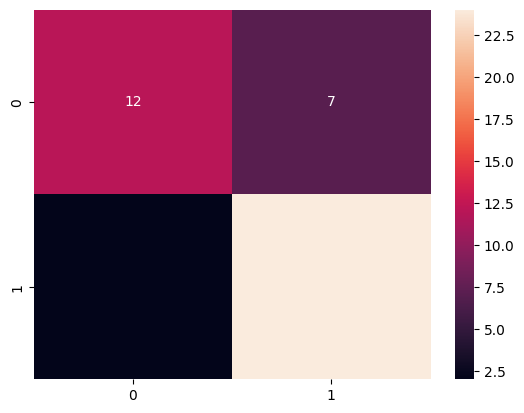

In [20]:
#Visualize the confusion matrix
sns.heatmap(matrix, annot=True)
plt.show()

## Calculate the model's accuracy

In [33]:
Accuracy=accuracy_score(y_test,y_pred)
Accuracy*100

82.22222222222221

# The model's Accuracy is 80%


In [34]:
Report= classification_report(y_test, y_pred)
print(Report)

              precision    recall  f1-score   support

        FAKE       0.87      0.68      0.76        19
        REAL       0.80      0.92      0.86        26

    accuracy                           0.82        45
   macro avg       0.83      0.80      0.81        45
weighted avg       0.83      0.82      0.82        45

